In [2]:
pip install statsmodels


# Problem-1
Delivery_time -> Predict delivery time using sorting time .....?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import statistics
import numpy as np
import statsmodels.formula.api as smf

# EDA

In [42]:
time1=pd.read_csv("delivery_time.csv")

In [43]:
df2 = time1.rename({'Delivery Time': 'Delivery_Time', 'Sorting Time': 'Sorting_Time'}, axis=1) 

In [44]:
time1.shape

(21, 2)

In [45]:
df2

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [46]:
df2.head(2)

,Delivery_Time,Sorting_Time
0,21.0,10
1,13.5,4


In [47]:
df2.describe()

,Delivery_Time,Sorting_Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [48]:
df2.tail(2)

,Delivery_Time,Sorting_Time
19,17.83,7
20,21.50,5


# CORRELATION ANALYSIS

In [49]:
df2.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


In [50]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_Time  21 non-null     float64
 1   Sorting_Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


# VISUALIZATION

<Figure size 360x360 with 0 Axes>

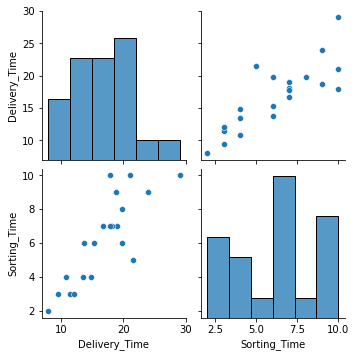

In [51]:
plt.figure(figsize=(5,5))
sn.pairplot(df2)

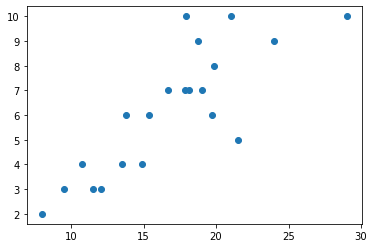

In [53]:
plt.scatter(df2["Delivery_Time"],df2["Sorting_Time"])

(21, 2) Shape of Data Frame
   Delivery_Time  Sorting_Time
0          21.00            10
1          13.50             4
2          19.75             6
3          24.00             9
4          29.00            10
5          15.35             6
6          19.00             7
7           9.50             3
8          17.90            10
9          18.75             9


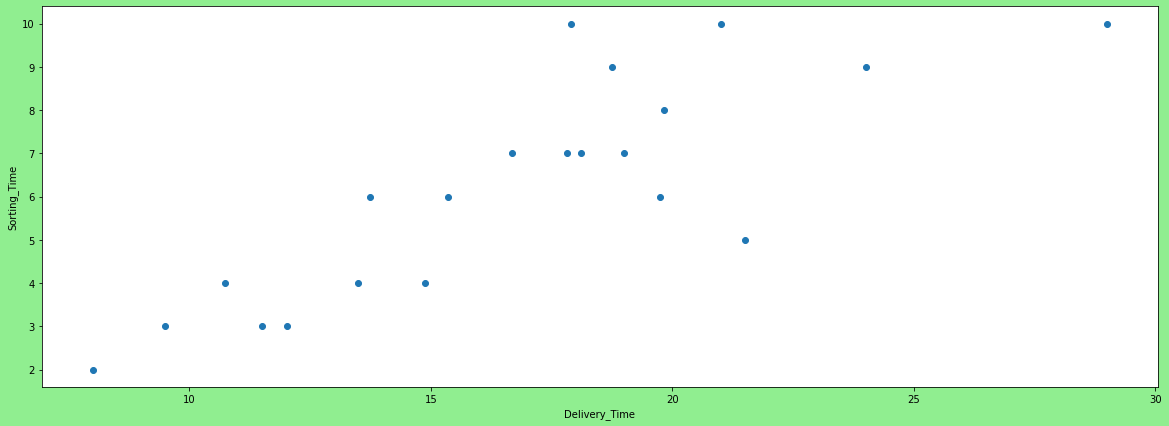

In [119]:
print (df2.shape,"Shape of Data Frame")
print ("="*30)

print (df2.head(10))

plt.figure(figsize=(20,7),facecolor="lightgreen")
plt.scatter(df2.Delivery_Time,df2.Sorting_Time)
plt.xlabel("Delivery_Time");
plt.ylabel("Sorting_Time")

plt.show()

# REGRESSION MODEL

# 1.MODEL

In [54]:
first_model=smf.ols("Delivery_Time~Sorting_Time",data=df2).fit()

In [103]:
first_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 02 Jan 2023   Prob (F-statistic):           3.98e-06
Time:                        11:26:44   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [96]:
first_model.predict()

array([23.07293294, 13.17881356, 16.47685335, 21.42391304, 23.07293294,
       16.47685335, 18.12587325, 11.52979366, 23.07293294, 21.42391304,
       19.77489315, 13.17881356, 18.12587325, 11.52979366, 11.52979366,
       13.17881356, 16.47685335, 18.12587325,  9.88077377, 18.12587325,
       14.82783346])

# 2.MODEL USING "LOG"

In [63]:
second_model=smf.ols("Delivery_Time~np.log(Sorting_Time)",data=df2).fit()

In [71]:
second_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Mon, 02 Jan 2023   Prob (F-statistic):           2.64e-06
Time:                        10:34:26   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(Sorting_Time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 3. MODEL USING "EXP"

In [66]:
third_model=smf.ols("Delivery_Time~np.exp(Sorting_Time)",data=df2).fit()
# AT = a*WC+b
# AT = a*log(wc)+b
# AT = a*exp(wc)+b

In [72]:
third_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     10.74
Date:                Mon, 02 Jan 2023   Prob (F-statistic):            0.00396
Time:                        10:34:36   Log-Likelihood:                -58.691
No. Observations:                  21   AIC:                             121.4
Df Residuals:                      19   BIC:                             123.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               15.0836      1.047     14.406      0.000      12.892      17.275
np.exp(Sorting_Time)     0.0004      0.000      3.277      0.004       0.000       0.001
==============================================================================
Omnibus:                        2.426   Durbin-Watson:                   1.676
Prob(Omnibus):                  0.297   Jarque-Bera (JB):                1.151
Skew:                          -0.087   Prob(JB):                        0.562
Kurtosis:                       1.866   Cond. No.                     1.01e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 4.MODEL USING "SQ"

In [81]:
Sorting_Time_sq=df2['Sorting_Time']**2
fourth_model=smf.ols("np.log(Delivery_Time)~Sorting_Time+Sorting_Time_sq",data=df2).fit()

In [82]:
fourth_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_Time)   R-squared:                       0.765
Model:                               OLS   Adj. R-squared:                  0.739
Method:                    Least Squares   F-statistic:                     29.28
Date:                   Mon, 02 Jan 2023   Prob (F-statistic):           2.20e-06
Time:                           10:56:15   Log-Likelihood:                 9.9597
No. Observations:                     21   AIC:                            -13.92
Df Residuals:                         18   BIC:                            -10.79
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.6997      0.228      7.441      0.000       1.220       2.180
Sorting_Time        0.2659      0.080      3.315      0.004       0.097       0.434
Sorting_Time_sq    -0.0128      0.006     -2.032      0.057      -0.026       0.000
==============================================================================
Omnibus:                        2.548   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.280   Jarque-Bera (JB):                1.777
Skew:                           0.708   Prob(JB):                        0.411
Kurtosis:                       2.846   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#  5. MODEL USING "LOG" IN TARGET

In [88]:
fifth_model=smf.ols("np.log(Delivery_Time)~Sorting_Time",data=df2).fit()

In [89]:
fifth_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_Time)   R-squared:                       0.711
Model:                               OLS   Adj. R-squared:                  0.696
Method:                    Least Squares   F-statistic:                     46.73
Date:                   Mon, 02 Jan 2023   Prob (F-statistic):           1.59e-06
Time:                           11:09:55   Log-Likelihood:                 7.7920
No. Observations:                     21   AIC:                            -11.58
Df Residuals:                         19   BIC:                            -9.495
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1214      0.103     20.601      0.000       1.906       2.337
Sorting_Time     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# MODEL PREDICTION

In [83]:
fourth_model.resid

0    -0.030341
1     0.044747
2     0.150179
3     0.125141
4     0.292433
5    -0.101859
6     0.012471
7    -0.130613
8    -0.190063
9    -0.121719
10   -0.018085
11   -0.183037
12   -0.117758
13    0.060442
14    0.105499
15    0.142076
16   -0.211935
17   -0.035504
18   -0.100744
19   -0.051086
20    0.359754
dtype: float64

In [84]:
fourth_model.predict()

array([3.07486324, 2.55794231, 2.8329741 , 3.05291276, 3.07486324,
       2.8329741 , 2.9319682 , 2.38190461, 3.07486324, 3.05291276,
       3.00528108, 2.55794231, 2.9319682 , 2.38190461, 2.38190461,
       2.55794231, 2.8329741 , 2.9319682 , 2.1801857 , 2.9319682 ,
       2.70829881])

In [90]:
np.exp(fourth_model.predict())

array([21.64692131, 12.90922678, 16.99593341, 21.17693809, 21.64692131,
       16.99593341, 18.76452642, 10.82550156, 21.64692131, 21.17693809,
       20.19189087, 12.90922678, 18.76452642, 10.82550156, 10.82550156,
       12.90922678, 16.99593341, 18.76452642,  8.84794916, 18.76452642,
       15.00372959])

# 4th Model is Good Because Its Gives Best R_SQ Square

# 2.PROBLEM STATEMENT
Salary_hike -> Build a prediction model for Salary_hike

In [105]:
ls

 Volume in drive C is ssd
 Volume Serial Number is 344C-651C

 Directory of C:\Users\phoneclicker\Downloads\excelr_kd\ASSIGNMENT\slr

01/02/2023  11:26 AM    <DIR>          .
01/02/2023  11:26 AM    <DIR>          ..
12/01/2022  01:58 PM    <DIR>          .ipynb_checkpoints
11/29/2022  03:33 PM               218 delivery_time.csv
11/29/2022  03:33 PM               454 Salary_Data.csv
01/02/2023  11:26 AM           114,364 SLR_ASSIGNMENT_deliverytime.ipynb
               3 File(s)        115,036 bytes
               3 Dir(s)  23,439,745,024 bytes free


In [106]:
sd=pd.read_csv("Salary_Data.csv")

# EDA

In [110]:
sd.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [113]:
sd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [117]:
sd.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


# Visualization

(30, 2) Shape of Data Frame
   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0
5              2.9  56642.0
6              3.0  60150.0
7              3.2  54445.0
8              3.2  64445.0
9              3.7  57189.0


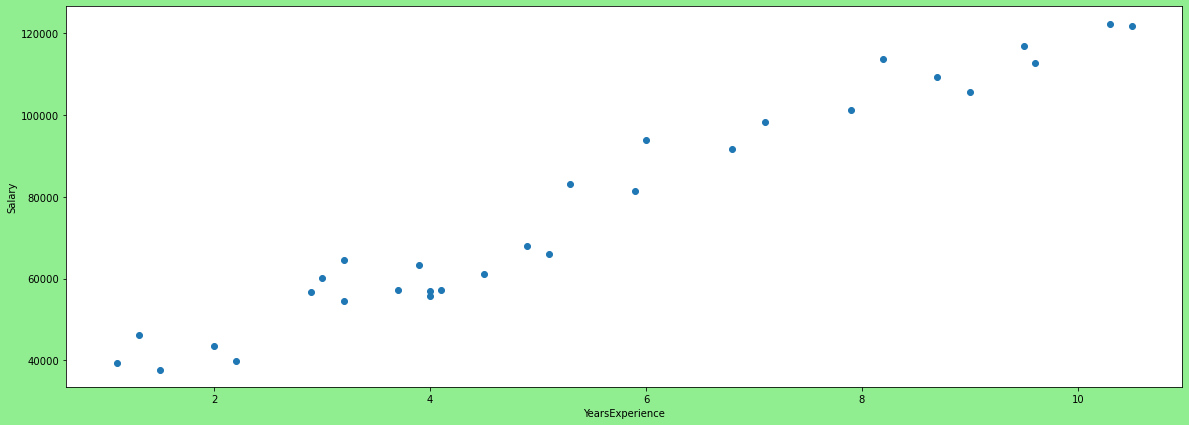

In [118]:
print (sd.shape,"Shape of Data Frame")
print ("="*30)

print (sd.head(10))

plt.figure(figsize=(20,7),facecolor="lightgreen")
plt.scatter(sd.YearsExperience,sd.Salary)
plt.xlabel("YearsExperience");
plt.ylabel("Salary")

plt.show()

<Figure size 360x360 with 0 Axes>

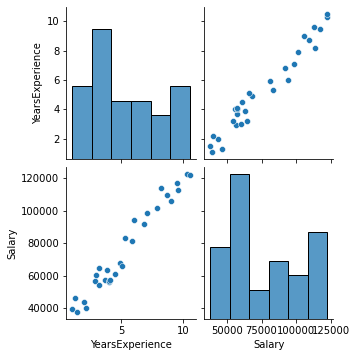

In [120]:
plt.figure(figsize=(5,5))
sn.pairplot(sd)

# Regression Model

# 1st Model

In [121]:
first_model = smf.ols("YearsExperience~Salary",data=sd).fit()

In [123]:
first_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        YearsExperience   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 02 Jan 2023   Prob (F-statistic):           1.14e-20
Time:                        11:48:20   Log-Likelihood:                -26.168
No. Observations:                  30   AIC:                             56.34
Df Residuals:                      28   BIC:                             59.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.3832      0.327     -7.281      0.000      -3.054      -1.713
Salary         0.0001   4.06e-06     24.950      0.000     9.3e-05       0.000
==============================================================================
Omnibus:                        3.544   Durbin-Watson:                   1.587
Prob(Omnibus):                  0.170   Jarque-Bera (JB):                2.094
Skew:                          -0.412   Prob(JB):                        0.351
Kurtosis:                       2.003   Cond. No.                     2.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 2nd Model Using "np.log"

In [124]:
second_model=smf.ols("YearsExperience~np.log(Salary)",data=sd).fit()

In [125]:
second_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        YearsExperience   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Mon, 02 Jan 2023   Prob (F-statistic):           7.03e-18
Time:                        11:49:50   Log-Likelihood:                -33.035
No. Observations:                  30   AIC:                             70.07
Df Residuals:                      28   BIC:                             72.87
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -77.6961      4.241    -18.322      0.000     -86.383     -69.009
np.log(Salary)     7.4288      0.379     19.585      0.000       6.652       8.206
==============================================================================
Omnibus:                        1.748   Durbin-Watson:                   1.348
Prob(Omnibus):                  0.417   Jarque-Bera (JB):                1.213
Skew:                          -0.227   Prob(JB):                        0.545
Kurtosis:                       2.126   Cond. No.                         347.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 3rd Model Using "sq"

In [133]:
Salary_sq=sd['Salary']**2
third_model=smf.ols("np.log(YearsExperience)~Salary+Salary_sq",data=sd).fit()

In [134]:
third_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     np.log(YearsExperience)   R-squared:                       0.907
Model:                                 OLS   Adj. R-squared:                  0.901
Method:                      Least Squares   F-statistic:                     132.3
Date:                     Mon, 02 Jan 2023   Prob (F-statistic):           1.12e-14
Time:                             11:54:30   Log-Likelihood:                 7.7666
No. Observations:                       30   AIC:                            -9.533
Df Residuals:                           27   BIC:                            -5.330
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.5369      0.381     -4.036      0.000      -2.318      -0.755
Salary      6.153e-05   1.03e-05      5.951      0.000    4.03e-05    8.27e-05
Salary_sq  -2.514e-10   6.37e-11     -3.949      0.001   -3.82e-10   -1.21e-10
==============================================================================
Omnibus:                        3.765   Durbin-Watson:                   1.047
Prob(Omnibus):                  0.152   Jarque-Bera (JB):                2.504
Skew:                          -0.687   Prob(JB):                        0.286
Kurtosis:                       3.340   Cond. No.                     8.31e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.31e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# MODEL PREDICTION

In [135]:
first_model.predict()

array([ 1.60093427,  2.29581922,  1.43769402,  2.02442725,  1.65642785,
        3.35272891,  3.70796884,  3.13024825,  4.14290484,  3.40812122,
        4.01865188,  3.26685563,  3.38462759,  3.39718453,  3.80528514,
        4.49662579,  4.30330965,  6.03080053,  5.85611727,  7.12973546,
        6.90674848,  7.56851956,  7.87525325,  9.14208664,  8.69844179,
        8.30867027,  9.46178233,  9.02289696, 10.01084473,  9.95828786])

In [136]:
np.exp(first_model.predict())

array([4.95766204e+00, 9.93256964e+00, 4.21097420e+00, 7.57177299e+00,
       5.24055730e+00, 2.85806211e+01, 4.07709100e+01, 2.28796588e+01,
       6.29855191e+01, 3.02084359e+01, 5.56260647e+01, 2.62287366e+01,
       2.95070019e+01, 2.98798557e+01, 4.49380618e+01, 8.97139066e+01,
       7.39441182e+01, 4.16047955e+02, 3.49365016e+02, 1.24854664e+03,
       9.98993709e+02, 1.93627163e+03, 2.63135249e+03, 9.34023455e+03,
       5.99356570e+03, 4.05891213e+03, 1.28587826e+04, 8.29076034e+03,
       2.22666369e+04, 2.11265930e+04])

# 1th Model is Good Because Its Gives Best R_SQ Square